<a href="https://colab.research.google.com/github/Huynh-Truong-75/-Homework_ANN/blob/main/flower_identificationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tạo Dữ Liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/drive/folders/1UtEF-zOFzF3CbSfh01vivsWhl6wN9RDF?usp=sharing

In [7]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

hoa = ['hoacuc','hoamattroi','hoathuocduoc','hoavantho']
dir_train = '/content/drive/MyDrive/flower' 
distpath = []
y_data = []
x_data = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_data, y_data):
  for i in hoa:
    path = os.path.join(dir,i)
    index_label = hoa.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_data.append(img)
      y_data.append(index_label)
create_data(dir_train, x_data, y_data) #tạo dữ liệu 
# xử lí dữ liệu
x_data = np.array(x_data)
x_data = x_data.reshape(84,150*150*3)
y_data = np.array(y_data)
y_data = np_utils.to_categorical(y_data)
print(x_data.shape) 
print(y_data.shape)

(84, 67500)
(84, 4)


In [8]:
from  sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test= train_test_split(x_data, y_data, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

**Xây Dựng model**

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(256, activation='relu', name='layer2'))
model.add(Dense(128, activation='relu', name='layer3'))
model.add(Dense(4, activation='softmax', name='layer4'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 4)                 516       
                                                                 
Total params: 34,725,252
Trainable params: 34,725,252
Non-trainable params: 0
_________________________________________________________________


**compile và train model**

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs = 50, validation_data=(X_val, y_val))                #, batch_size=256
model.save('hoa.h5')

Epoch 1/50
2/2 [==============================] - 2s 396ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1779 - val_accuracy: 0.7143
Epoch 2/50
2/2 [==============================] - 0s 224ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1645 - val_accuracy: 0.7143
Epoch 3/50
2/2 [==============================] - 0s 249ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1497 - val_accuracy: 0.7143
Epoch 4/50
2/2 [==============================] - 0s 257ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1345 - val_accuracy: 0.7143
Epoch 5/50
2/2 [==============================] - 0s 226ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1158 - val_accuracy: 0.7143
Epoch 6/50
2/2 [==============================] - 0s 237ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.0946 - val_accuracy: 0.7143
Epoch 7/50
2/2 [==============================] - 0s 182ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.0741 - val_accuracy:

**Đánh giá model**

In [17]:
score_train = model.evaluate(X_test, y_test)
print('do chinh xac',score_train)

1/1 [==============================] - 0s 94ms/step - loss: 2.4078 - accuracy: 0.8824
do chinh xac [2.407822847366333, 0.8823529481887817]


**Dự đoán Dữ Liệu Mới**
https://drive.google.com/drive/folders/1UtEF-zOFzF3CbSfh01vivsWhl6wN9RDF?usp=sharing

1/1 [==============================] - 0s 58ms/step
1
hoamattroi


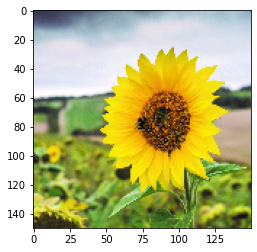

In [32]:
pic = load_img('/content/drive/MyDrive/flower_new/sunflower/2.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(a)
print(hoa[a])

1/1 [==============================] - 0s 39ms/step
hoavantho


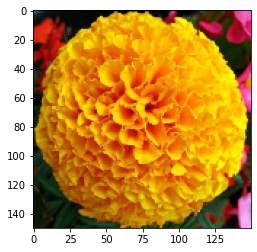

In [33]:
pic = load_img('/content/drive/MyDrive/flower_new/Marigold/1.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 74ms/step
hoathuocduoc
2


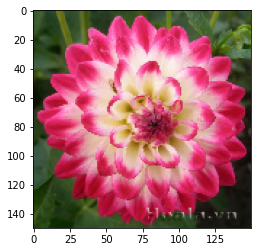

In [35]:
pic = load_img('/content/drive/MyDrive/flower_new/Dahliaflowers/3.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])
print(a)